In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow imblearn


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras import regularizers
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [ ]:
# Step 1: Load the dataset
data = pd.read_csv('FinancialMarketData.csv')

In [ ]:
data

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [ ]:
# Step 2: Data cleaning
# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())

Missing values in dataset:
Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


In [ ]:
# Fill missing values only for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [ ]:
# Verify no missing values remain
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


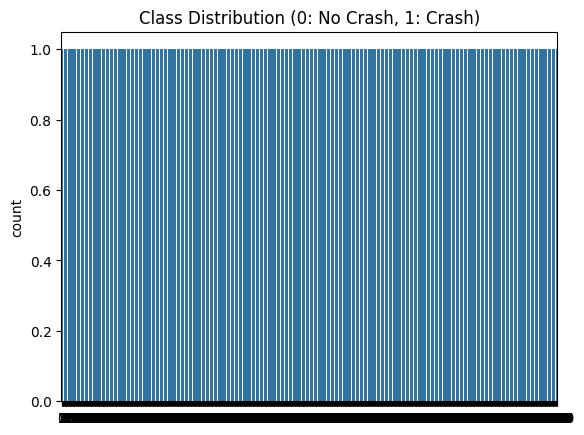

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Check class distribution
sns.countplot(data['Y'])
plt.title('Class Distribution (0: No Crash, 1: Crash)')
plt.show()

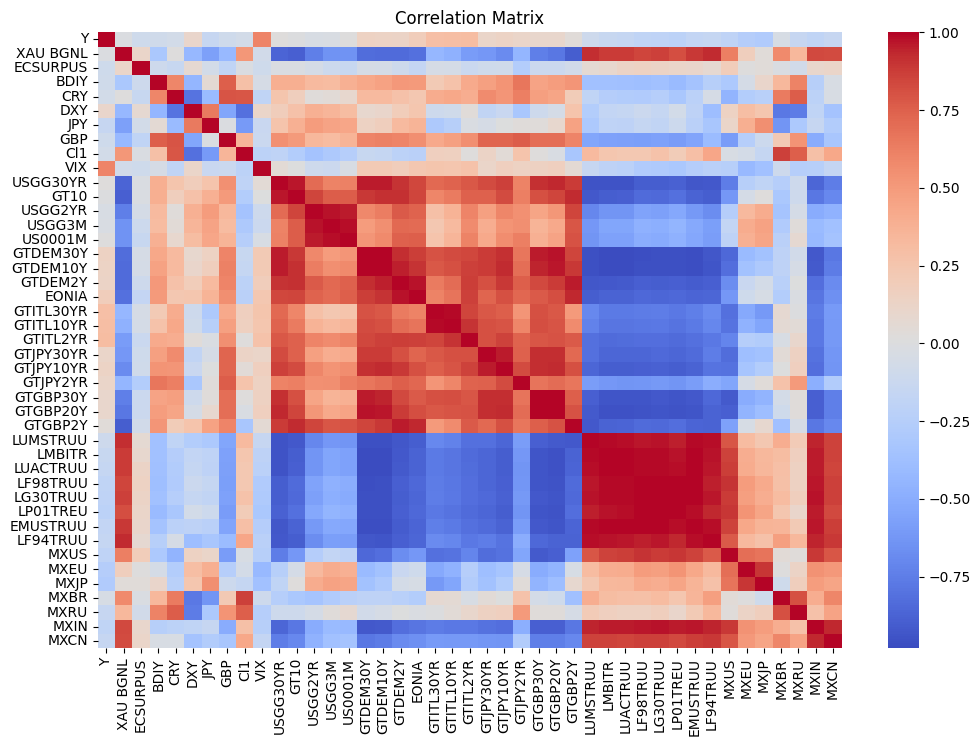

In [ ]:
# Assuming 'data' is your DataFrame
# Exclude non-numeric columns and calculate the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

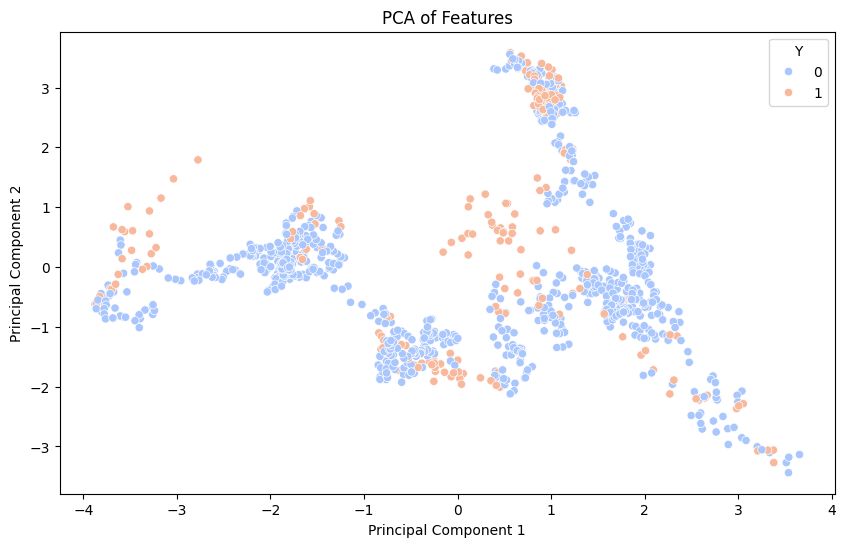

In [ ]:
# Step 5: Feature Selection
# Use correlation or domain knowledge to select features
# (Assume the first column is the target variable, Y)
features = ['XAU BGNL', 'BDIY', 'CRY', 'DXY', 'VIX', 'USGG30YR', 'MXUS']
X = data[features]
y = data['Y']
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Step 6: Train-Test Split and SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Step 7: Define the Neural Network Model
model = Sequential()

In [ ]:
# Add input layer
model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

In [ ]:
# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary output (0 or 1)


In [ ]:
# Step 8: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=83, batch_size=32, validation_split=0.2)


Epoch 1/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8895 - loss: 0.2667 - val_accuracy: 0.8929 - val_loss: 0.2856
Epoch 2/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9145 - loss: 0.2430 - val_accuracy: 0.8536 - val_loss: 0.3192
Epoch 3/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8864 - loss: 0.2681 - val_accuracy: 0.8536 - val_loss: 0.3539
Epoch 4/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9136 - loss: 0.2257 - val_accuracy: 0.8607 - val_loss: 0.3350
Epoch 5/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9047 - loss: 0.2425 - val_accuracy: 0.8536 - val_loss: 0.3516
Epoch 6/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8817 - loss: 0.2561 - val_accuracy: 0.8321 - val_loss: 0.3244
Epoch 7/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8964 - loss: 0.2488 - val_accuracy: 0.8821 - val_loss: 0.3192
Epoch 8/83
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.2404 - val_accuracy: 0.8464 - val_loss:

In [ ]:
# Step 10: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')  # Threshold at 0.5 for binary classification

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
# Step 11: Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

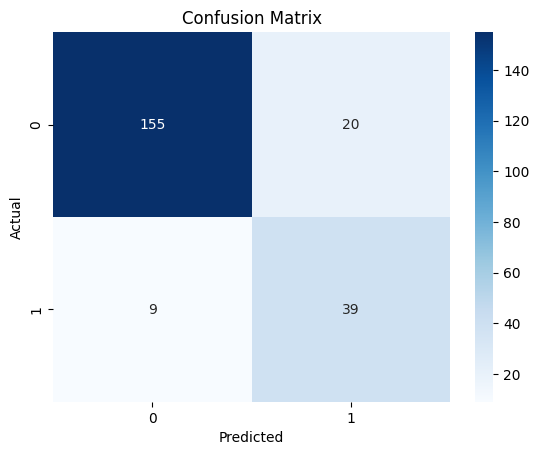

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


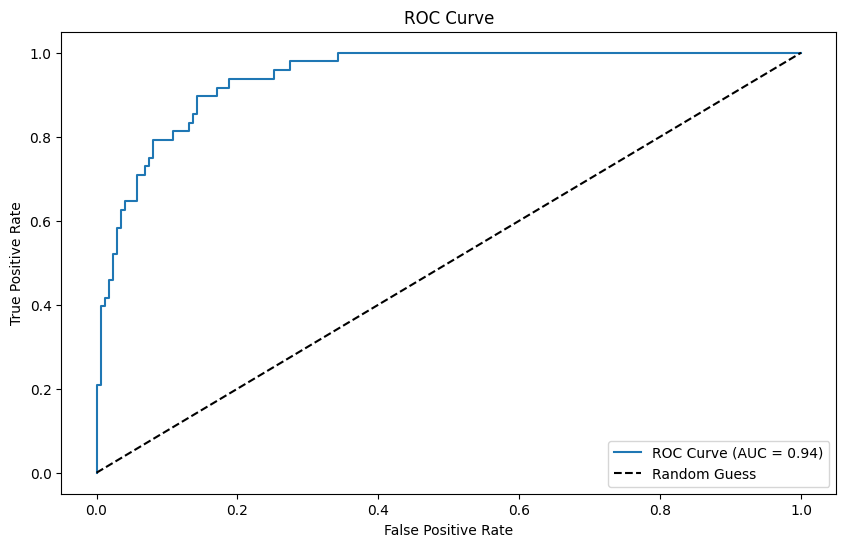

In [ ]:
# ROC-AUC Score and Curve
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

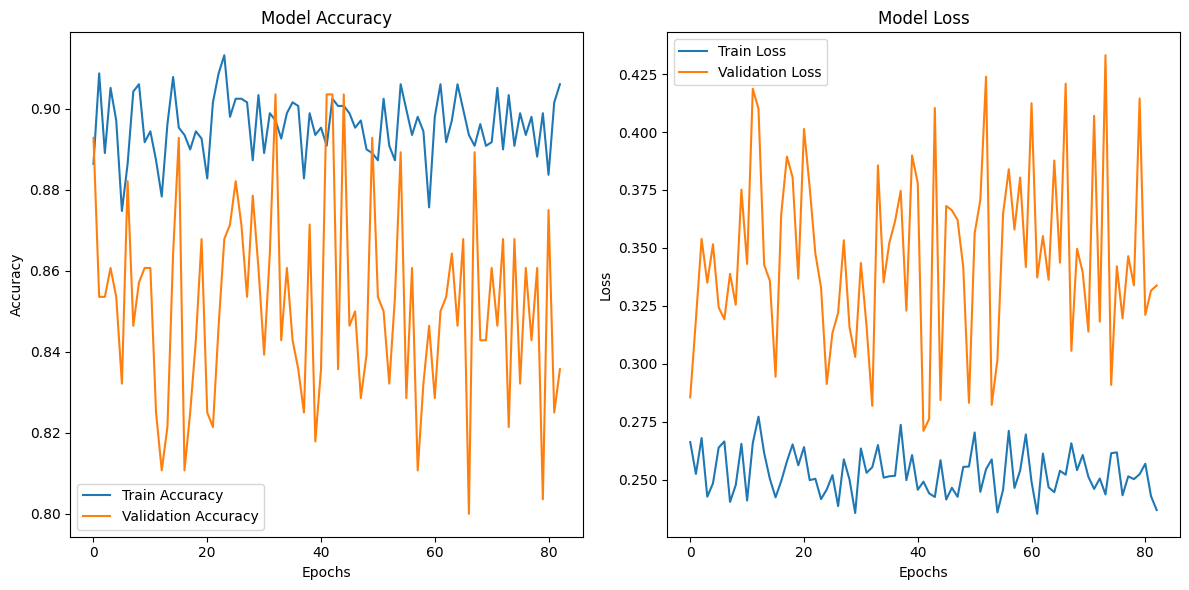

In [ ]:
# Step 12: Plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model to a file
model.save('anomaly_detection_model.h5')

# **Testing the Anomaly Detection Model**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Step 1: Load the saved model
model = load_model('anomaly_detection_model.h5')

# Step 2: Load data from CSV
financial_data = pd.read_csv('current_finance_data.csv')

# Step 3: Prepare your sample data with the same features as your training data
# Assuming the features are in the same order as specified in the columns
# Extract the relevant columns (assuming they match the original feature order)
sample_data = financial_data[['XAU', 'BGNL', 'BDIY', 'CRY', 'DXY', 'VIX', 'USGG30YR']].values

# Step 4: Preprocess the sample data (Standardize, as you did for the training data)
scaler = StandardScaler()
# If you have a saved scaler, load it instead of fitting a new one
# scaler = load_scaler('scaler.pkl')  # Uncomment if you have saved the scaler
sample_data_scaled = scaler.fit_transform(sample_data)  # Ensure you use the same scaler that you used for training

# Step 5: Make predictions on the sample data
predictions = model.predict(sample_data_scaled)

# Step 6: Define a threshold for crash prediction
threshold = 0.5  # Adjust this threshold as needed

# Step 7: Display the prediction
for i, prediction in enumerate(predictions):
    print(f"Sample {i + 1}: {sample_data[i]}")
    print(f"  Probability of Crash: {prediction[0]:.2f}")
    if prediction[0] > threshold:
        print("  Prediction: Market Crash")
    else:
        print("  Prediction: No Crash")
    print("-" * 40)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Sample 1: [1.2e+03 1.5e+03 4.5e+01 8.0e-01 5.0e-01 2.3e+00 1.0e+02]
  Probability of Crash: 0.00
  Prediction: No Crash
----------------------------------------
Sample 2: [120.  100.   45.    0.8   0.5   2.3 100. ]
  Probability of Crash: 0.10
  Prediction: No Crash
----------------------------------------
Sample 3: [10.  10.  45.   0.8  0.5  2.3 10. ]
  Probability of Crash: 0.60
  Prediction: Market Crash
----------------------------------------
Sample 4: [1.0e+02 1.5e+03 4.5e+01 8.0e-01 5.0e-01 2.3e+00 1.0e+02]
  Probability of Crash: 0.65
  Prediction: Market Crash
----------------------------------------
